## Importing neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.rename(columns={'#Passengers':'passengers'},inplace=True)
data = data['passengers']
data=np.array(data).reshape(-1,1)

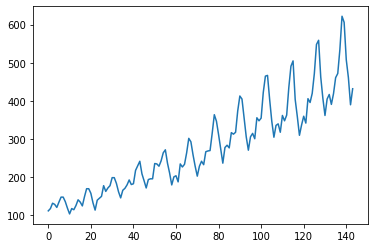

In [4]:
plt.plot(data)

## Feature Scaling

In [5]:
scaler= MinMaxScaler()
data=scaler.fit_transform(data)

In [6]:
train_size=100
test_size=44

In [7]:
train=data[0:train_size,:]
test=data[train_size:,:]

In [8]:
train.shape

(100, 1)

In [9]:
test.shape

(44, 1)

In [14]:
def get_data(data, look_back):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(data[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
look_back = 1
X_train, y_train = get_data(train, look_back)

In [16]:
X_train.shape

(98, 1)

In [17]:
X_test, y_test = get_data(test, look_back)

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
X_train.shape

(98, 1, 1)

In [28]:
type(y_test)

numpy.ndarray

## Building the RNN

In [22]:
model = Sequential()
model.add(LSTM(5, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train, y_train, epochs=50, batch_size=1)

Train on 98 samples
Epoch 1/50
98/98 [==============================] - 2s 23ms/sample - loss: 0.0505
Epoch 2/50
98/98 [==============================] - 0s 3ms/sample - loss: 0.0235
Epoch 3/50
98/98 [==============================] - 0s 3ms/sample - loss: 0.0169
Epoch 4/50
98/98 [==============================] - 0s 3ms/sample - loss: 0.0150
Epoch 5/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0138
Epoch 6/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0125
Epoch 7/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0113
Epoch 8/50
98/98 [==============================] - 0s 3ms/sample - loss: 0.0101
Epoch 9/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0090
Epoch 10/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0078
Epoch 11/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0066
Epoch 12/50
98/98 [==============================] - 0s 3ms/sample - loss: 0.0056
Epoc

In [25]:
y_pred = model.predict(X_test)

In [26]:
scaler.scale_

array([0.0019305])

In [27]:
y_pred = scaler.inverse_transform(y_pred)

In [29]:
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

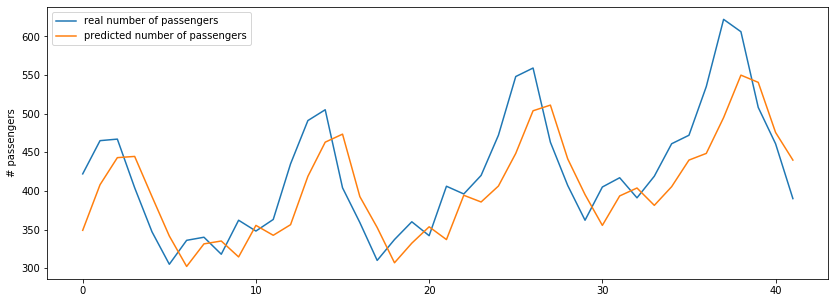

In [30]:
# plot baseline and predictions
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()